<a href="https://colab.research.google.com/github/dalshaikh/OpenCV-Library/blob/main/OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
#import the required libraries:
import cv2
import numpy as np
# required if you use Google Colab
from google.colab.patches import cv2_imshow
from google.colab import files

In [61]:
# loading the image:
def read_file(filename):
  img1 = cv2.imread(filename)
  cv2_imshow(img1)
  return img1

Saving img.jpg to img (2).jpg


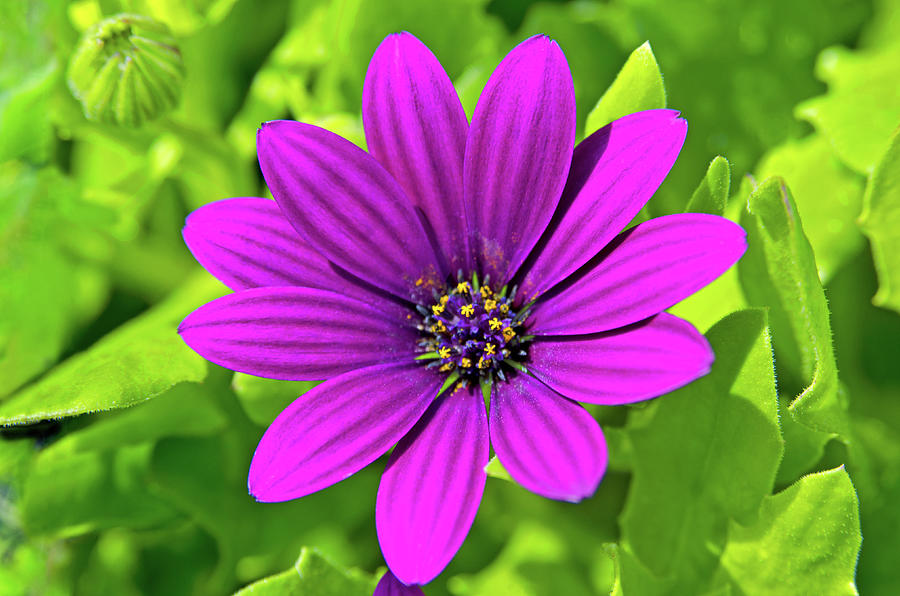

In [63]:
#Call the created function to load the image:
uploaded = files.upload()
filename = next(iter(uploaded))
img1 = read_file(filename)

In [64]:

def edge_mask(img, line_size, blur_value):
  gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
  return edges

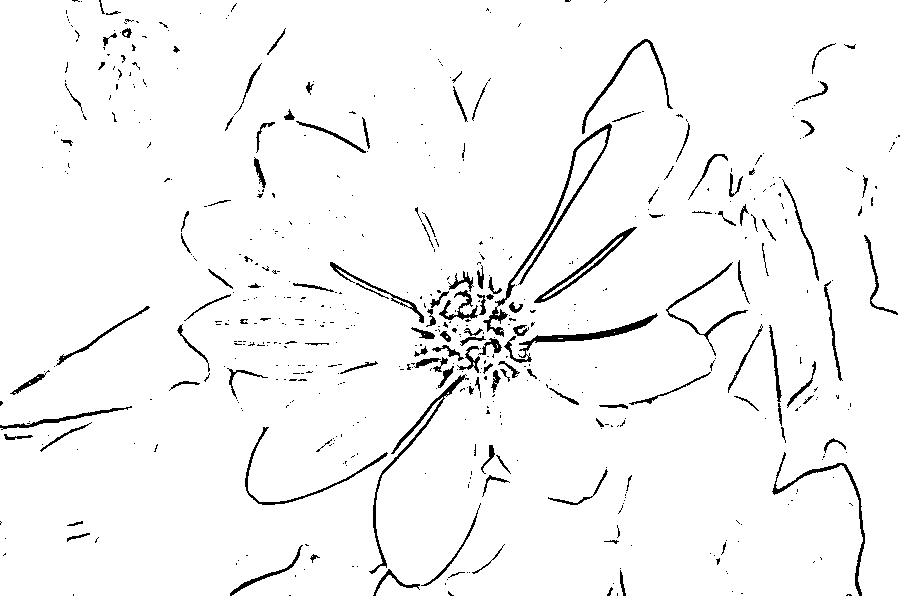

In [54]:
line_size = 7
blur_value = 7
edges = edge_mask(img1, line_size, blur_value)
cv2_imshow(edges)

In [55]:
def color_quantization(img, k):
# Transform the image
  data = np.float32(img1).reshape((-1, 3))

# Determine criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

# Implementing K-Means
  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img1.shape)
  return result

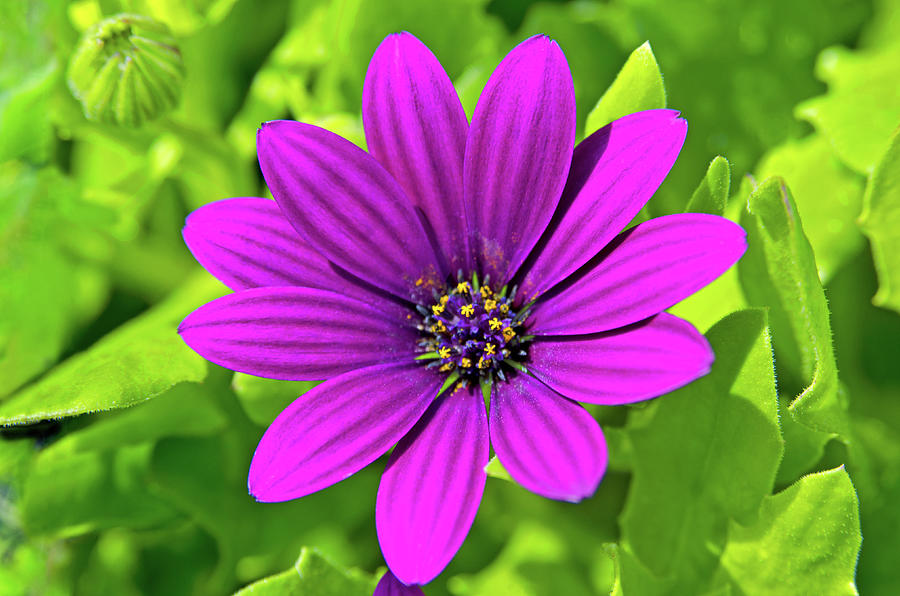

In [57]:
total_color = 9
img = color_quantization(img1, total_color)
cv2_imshow(img1)

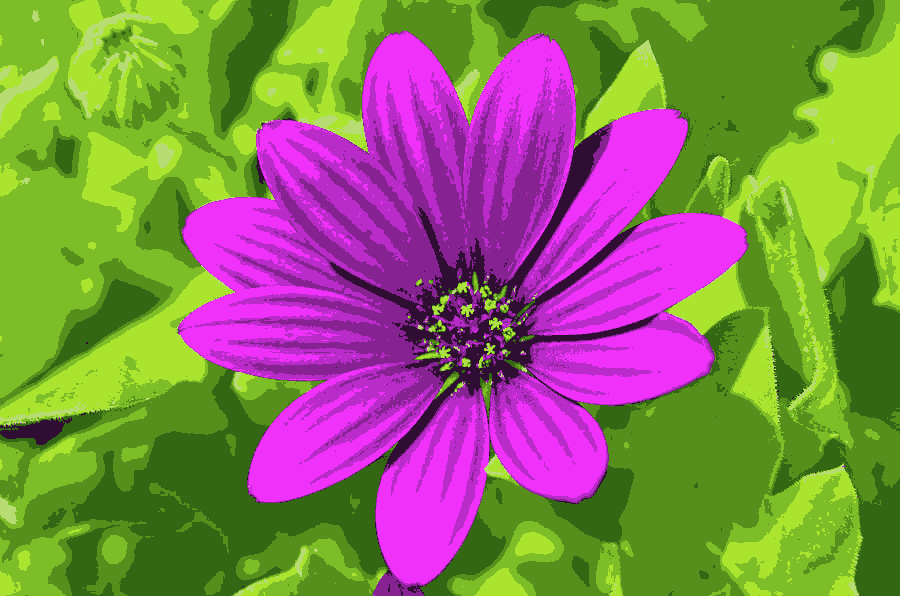

In [58]:
blurred = cv2.bilateralFilter(img, d=7, sigmaColor=200,sigmaSpace=200)
cv2_imshow(img)

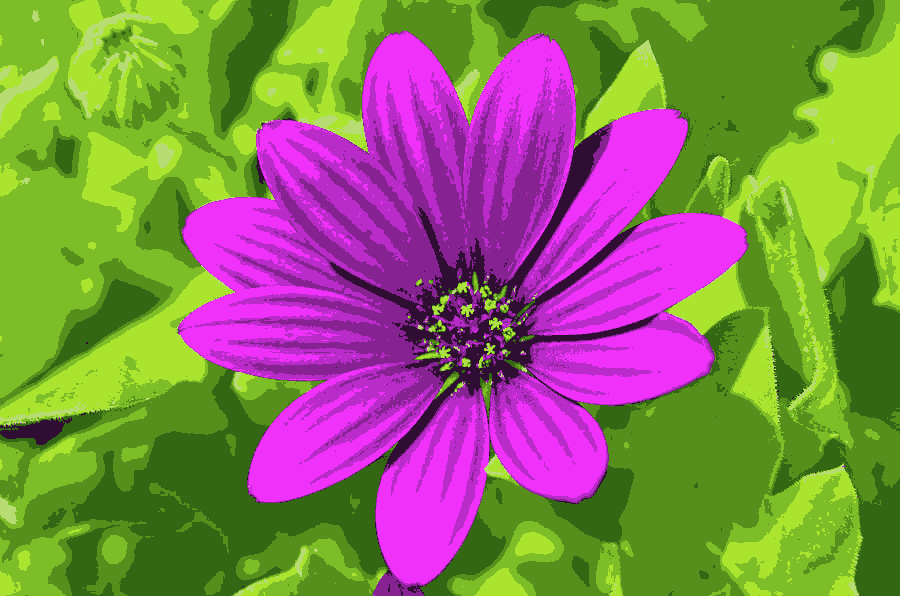

In [59]:
cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)
cv2_imshow(img)
